<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/AI-ML-Summer2022/blob/main/Assignment_2_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as py
import sklearn.discriminant_analysis
import random
from random import randint
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from numpy import sqrt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [2]:
# Question 1

In [3]:
mean_1 = []
mean_2 = []
for i in range(1,11):
    value_1 = randint(0, 10)
    mean_1.append(value_1)
    value_2 = randint(0, 10)
    mean_2.append(value_2)
print("Mean 1: ", mean_1)
print("Mean 2: ",mean_2)

Mean 1:  [4, 0, 4, 3, 3, 9, 5, 8, 5, 5]
Mean 2:  [1, 3, 2, 8, 5, 2, 10, 2, 3, 5]


In [4]:
diagonal_1 = np.diag(random.sample(range(1,11),10))
diagonal_2 = np.diag(random.sample(range(1,11),10))
m = 0
for m in range(5):
    diagonal_1[random.randrange(10)][random.randrange(10)] = random.randrange(10)
    diagonal_2[random.randrange(10)][random.randrange(10)] = random.randrange(10)
    m = -1
covariance_1 = diagonal_1
covariance_2 = diagonal_2
print("Covariance 1 Matrix: ", covariance_1, covariance_1.shape)
print("Covariance 2 Matrix: ", covariance_2, covariance_2.shape)

Covariance 1 Matrix:  [[ 9  0  0  0  0  6  0  3  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  4  8  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 10]] (10, 10)
Covariance 2 Matrix:  [[ 5  0  0  0  0  0  0  0  0  8]
 [ 0  4  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  6]
 [ 0  0  0  0  5  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  3  7]
 [ 0  0  0  0  1  0  0  0  0 10]] (10, 10)


In [5]:
a, b, c, d, e, f, g, h, i, j = np.random.multivariate_normal(mean_1, covariance_1, 1000).T
A1 = np.vstack((a, b, c, d, e, f, g, h, i, j)).T
print("A1: ", A1)

k, l, m, n, o, p, q, r, s, t = np.random.multivariate_normal(mean_2, covariance_2, 1000).T
B1 = np.vstack((k, l, m, n, o, p, q, r, s, t)).T
print("B1: ", B1)

A1:  [[ 1.46626766  0.56275763  4.64378946 ...  5.26284745  4.37483282
   5.10379756]
 [ 6.6427218  -1.91825773  9.98881766 ... 12.33131417  8.70154244
   5.22278111]
 [ 9.1965496  -1.05519517  1.15360525 ... 10.67627788  6.02895598
   9.31067613]
 ...
 [ 5.19713312  6.07179874  2.15953791 ...  7.95855897  1.84829997
   4.59798691]
 [ 5.91120315  3.38049261  5.93708613 ...  6.96789975  0.08493066
   2.87647851]
 [ 2.37473263 -1.61826537  1.98522717 ...  7.67422309  7.90060897
   5.01405512]]
B1:  [[ 1.51454797  4.56186371  2.67886055 ...  2.42128001  5.122102
  11.42241964]
 [ 2.21781233  4.36890687  2.1299313  ...  2.69003035  1.71815097
   2.32800528]
 [ 0.24215222  4.34337956  2.31348475 ...  4.05978859  1.24285774
  -1.72160094]
 ...
 [ 3.86307795  0.51170592  3.83571903 ...  2.78409326  3.68075188
   4.55388595]
 [-2.42504973  4.97297757  3.43935693 ... -1.62896809  4.7452449
   0.8511212 ]
 [ 0.03685783  3.9704299   1.43652071 ... -0.85937308  3.42183132
   2.96755084]]


<ipython-input-5-62a5cd52fb9b>:1: RuntimeWarning: covariance is not positive-semidefinite.
  a, b, c, d, e, f, g, h, i, j = np.random.multivariate_normal(mean_1, covariance_1, 1000).T
<ipython-input-5-62a5cd52fb9b>:5: RuntimeWarning: covariance is not positive-semidefinite.
  k, l, m, n, o, p, q, r, s, t = np.random.multivariate_normal(mean_2, covariance_2, 1000).T


(2000, 10)


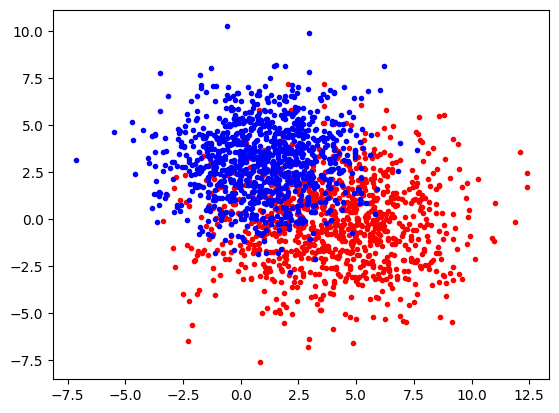

In [6]:
plt.scatter(A1[:,0], A1[:,1], c='r', marker='.')
plt.scatter(B1[:,0], B1[:,1], c='b' , marker='.')
ans = np.concatenate((A1,B1),axis=0)
print(ans.shape)

In [7]:
# Question 2 A

Eigen vector =  [ 2.36738253  4.1667887   4.41099899  4.6353746   5.54224342  5.91109867
  7.29400126  7.65032106 12.91366062 48.00183743] 
Eigen values =  [[-3.66870022e-01  3.17074768e-01  7.00911694e-02 -1.60773006e-01
   6.23469565e-01 -4.49847392e-01  6.55054051e-02 -2.29138311e-01
   1.19400178e-01 -2.68291906e-01]
 [ 1.98397939e-01 -2.56718461e-01 -5.86012940e-01 -6.22527337e-01
   2.36696975e-01  7.91761075e-02  1.32382684e-01 -1.54394928e-01
   3.56429676e-02  2.42599947e-01]
 [-3.78399029e-02  7.69618703e-03  2.27583174e-03  6.26352572e-02
   8.86887680e-02  1.52828448e-01  8.76184411e-01  4.14410878e-01
   3.51044834e-02 -1.50633668e-01]
 [ 1.39718290e-01 -1.95821153e-01 -1.17048032e-01  6.73402890e-01
   4.39856987e-01  7.38342608e-02  1.19863587e-01 -3.26210818e-01
   8.08816174e-02  3.85633117e-01]
 [-4.18219508e-01  5.04411109e-01 -1.99242370e-01  1.79781949e-04
  -2.47498624e-01  5.01370657e-01  1.36891068e-01 -4.28338873e-01
   4.42753329e-02  1.19006544e-01]
 [ 3.2869

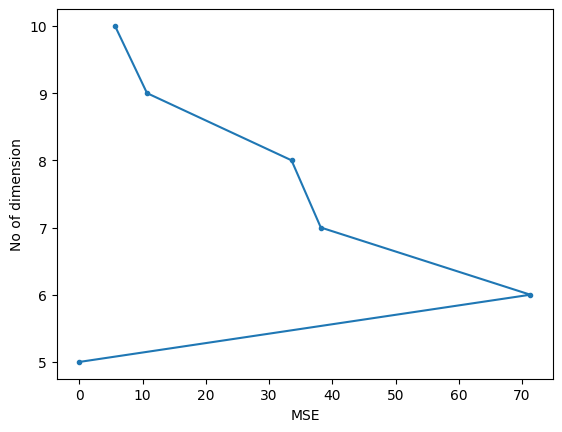

In [8]:
center_mean = ans - np.mean(ans, axis=0)
cov= np.cov(center_mean, rowvar = False)
eigen_vector, eigen_value = np.linalg.eigh(cov)
print("Eigen vector = " , eigen_vector,'\nEigen values = ', eigen_value)

sorted_index = np.argsort(eigen_vector)[::-1]
new_ev = eigen_vector[sorted_index]
new_eig_vec = eigen_value[:, sorted_index]
reduced_Dataset = np.dot(ans, new_eig_vec)
MSE_VAL = []

for k in range(9,4,-1):
    Post_pca = reduced_Dataset[:,0:k]
    Post_pca = np.dot(Post_pca, new_eig_vec[:,0:k].T)
    MSE = sum(sum((Post_pca - ans)**2))/len(ans)
    MSE_VAL.append(MSE)

MSE_VAL.append(0)
MSE_VAL= [x for x in reversed (MSE_VAL)]
print("MSE values = ", MSE_VAL)
x = MSE_VAL
yplot = [5,6,7,8,9,10]
plt.plot(x, yplot, marker='.')
plt.ylabel("No of dimension")
plt.xlabel("MSE")
plt.show()

In [9]:
# Question 2 B

Accuracy Scores:  [0.996, 0.994, 0.962, 0.932, 0.872, 0.868, 0.76, 0.74, 0.512]


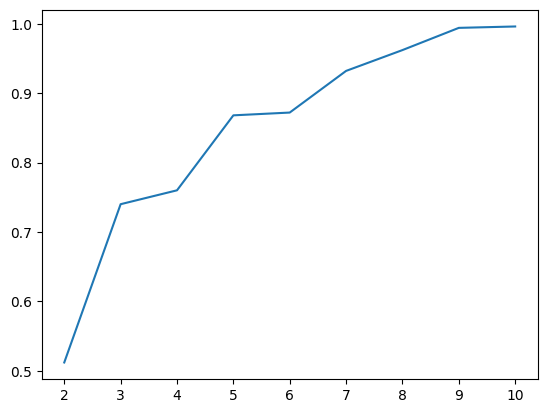

In [10]:
scores = []
accuracy_scores = []
MSE_VAL = []
Xc = np.zeros(1000)
Y = np.concatenate((Xc,np.ones(1000)))
for i in range(1, 10):
    X_train= ans[:1500,:-i]
    y_train= Y[:1500]
    X_test= ans[1500:,:-i]
    y_test= Y[1500:]
    model = LDA()
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    scores = np.append(scores,accuracy_score(y_test,y_preds))
    accuracy_scores.append(accuracy_score(y_test,y_preds))
print("Accuracy Scores: ", accuracy_scores)
plt.plot([10,9,8,7,6,5,4,3,2], scores)

In [11]:
# Question 3

Number of attributes removed: 1
Accuracy Score: [0.999  0.998  0.999  0.9995 0.995  0.9945 0.9975 0.992  0.999  0.999 ]
Best feature to remove in ascending order  [3 9 8 2 0 1 6 4 5 7]
Accuracy after removing the attribute:  0.9995

Number of attributes removed: 2
Accuracy Score: [0.999  0.9975 0.9985 0.993  0.992  0.995  0.988  0.999  0.9995]
Best feature to remove in ascending order  [8 7 0 2 1 5 3 4 6]
Accuracy after removing the attribute:  0.9995

Number of attributes removed: 3
Accuracy Score: [0.999  0.9985 0.999  0.9935 0.992  0.995  0.9885 0.999 ]
Best feature to remove in ascending order  [7 2 0 1 5 3 4 6]
Accuracy after removing the attribute:  0.999

Number of attributes removed: 4
Accuracy Score: [0.9985 0.998  0.999  0.993  0.99   0.995  0.9875]
Best feature to remove in ascending order  [2 0 1 5 3 4 6]
Accuracy after removing the attribute:  0.999

Number of attributes removed: 5
Accuracy Score: [0.999 0.998 0.992 0.988 0.996 0.984]
Best feature to remove in ascending or

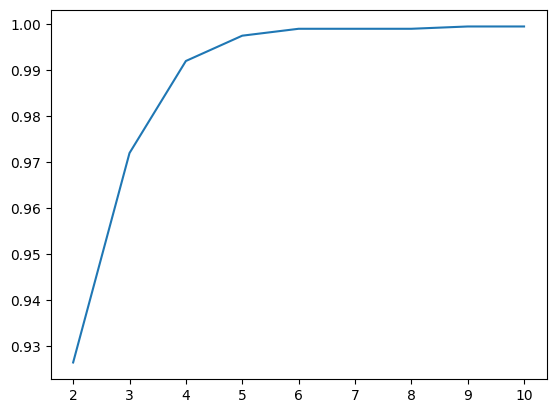

In [12]:
LDA = LDA()
Xc = np.zeros(1000)
Y = np.concatenate((Xc,np.ones(1000)))
X_mod = ans.copy()
scores = np.array([])
scr_plt = np.array([])
for i in range(0,9):
    for j in range(0,X_mod.shape[1]):
        LDA.fit(np.delete(X_mod,j,1),Y.ravel())
        y_preds = LDA.predict(np.delete(X_mod,j,1))
        scores = np.append(scores,accuracy_score(Y.ravel(),y_preds))
    print("Number of attributes removed:", i+1)
    print("Accuracy Score:", scores)
    drop = np.argsort(scores)[::-1]
    X_mod = np.delete(X_mod,drop[0], 1)
    print("Best feature to remove in ascending order ", drop)
    print("Accuracy after removing the attribute: ", scores[drop[0]])
    scr_plt = np.append(scr_plt, scores[drop[0]])
    scores = np.array([])
    print()

plt.plot([10,9,8,7,6,5,4,3,2], scr_plt)

In [13]:
# Question 4

In [14]:
print("From the results, it can be noted that Backward Feature selection gives better accuracy compared to PCA, when applied on data. PCA is used to reduce the dimensions without considering the target variable. Backward selection is a greedy approach, which finds the best attributes.")

From the results, it can be noted that Backward Feature selection gives better accuracy compared to PCA, when applied on data. PCA is used to reduce the dimensions without considering the target variable. Backward selection is a greedy approach, which finds the best attributes.
